In [ ]:
from google.colab import files 
files.upload() #upload your kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"choudhury6354","key":"4ec9662314cde104562954b1dd880b6f"}'}

In [ ]:
!mkdir ~/.kaggle #create a directory called .kaggle in the root folder
!cp kaggle.json ~/.kaggle/ #copy kaggle.json to this folder
!chmod 600 ~/.kaggle/kaggle.json #add full rights to this copied file

In [ ]:
!rm kaggle.json #remove the original one

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:18<00:00, 236MB/s]
100% 2.70G/2.70G [00:18<00:00, 157MB/s]


In [ ]:
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
!rm new-plant-diseases-dataset.zip

In [ ]:
import cv2
image = cv2.imread("New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG")
image

array([[[196, 163, 167],
        [195, 162, 166],
        [194, 161, 165],
        ...,
        [211, 182, 185],
        [209, 180, 183],
        [207, 178, 181]],

       [[199, 166, 170],
        [198, 165, 169],
        [197, 164, 168],
        ...,
        [212, 183, 186],
        [210, 181, 184],
        [209, 180, 183]],

       [[199, 166, 170],
        [198, 165, 169],
        [197, 164, 168],
        ...,
        [214, 185, 188],
        [212, 183, 186],
        [211, 182, 185]],

       ...,

       [[124,  90, 100],
        [126,  92, 102],
        [128,  94, 104],
        ...,
        [137, 110, 126],
        [137, 110, 126],
        [137, 110, 126]],

       [[125,  91, 101],
        [126,  92, 102],
        [127,  93, 103],
        ...,
        [133, 106, 122],
        [134, 107, 123],
        [134, 107, 123]],

       [[128,  94, 104],
        [127,  93, 103],
        [126,  92, 102],
        ...,
        [132, 105, 121],
        [133, 106, 122],
        [134, 107, 123]]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)
test_datagen = ImageDataGenerator(rescale = 1/255.0)

train_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
test_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size =(256, 256),  
                  batch_size = 32,
                  class_mode="categorical")

test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size =(256, 256),
                    batch_size = 32,
                    class_mode="categorical",
                    shuffle=False)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def cnn1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((3, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense((38), activation='softmax'))
    model.compile(optimizer='adam', metrics='Accuracy', loss='categorical_crossentropy')
    return model

In [ ]:
model_1=cnn1()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

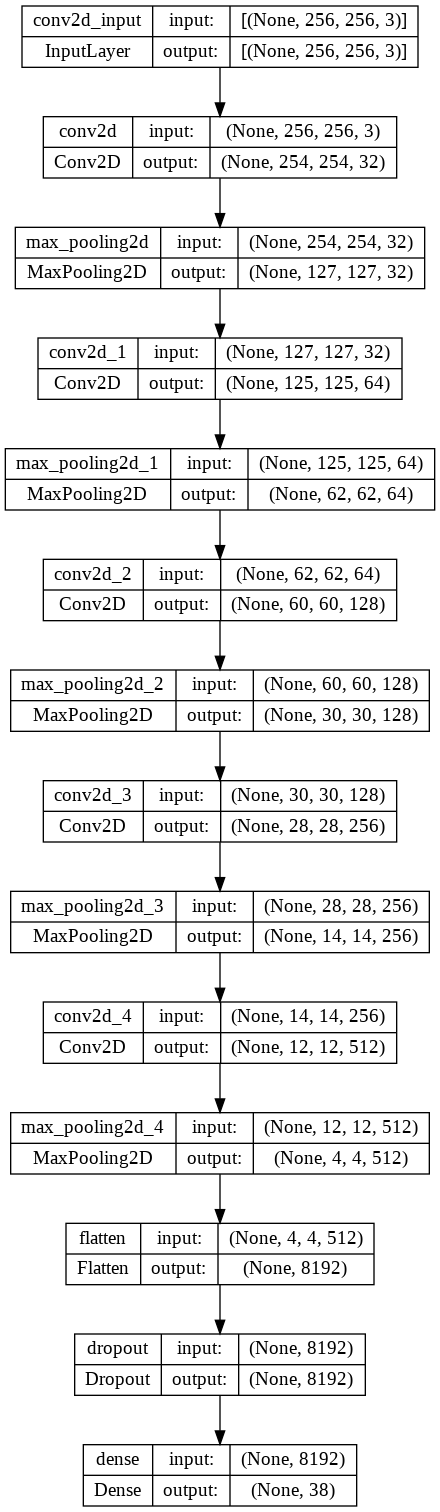

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
m1_res = model_1.fit(train_generator,
                     epochs = 5,
                     validation_data = test_generator)

Epoch 1/5
2197/2197 [==============================] - 262s 115ms/step - loss: 1.1831 - Accuracy: 0.6523 - val_loss: 0.3801 - val_Accuracy: 0.8824
Epoch 2/5
2197/2197 [==============================] - 233s 106ms/step - loss: 0.3527 - Accuracy: 0.8877 - val_loss: 0.2046 - val_Accuracy: 0.9336
Epoch 3/5
2197/2197 [==============================] - 233s 106ms/step - loss: 0.2224 - Accuracy: 0.9289 - val_loss: 0.1537 - val_Accuracy: 0.9524
Epoch 4/5
2197/2197 [==============================] - 233s 106ms/step - loss: 0.1761 - Accuracy: 0.9414 - val_loss: 0.1247 - val_Accuracy: 0.9588
Epoch 5/5
2197/2197 [==============================] - 231s 105ms/step - loss: 0.1426 - Accuracy: 0.9530 - val_loss: 0.1166 - val_Accuracy: 0.9632


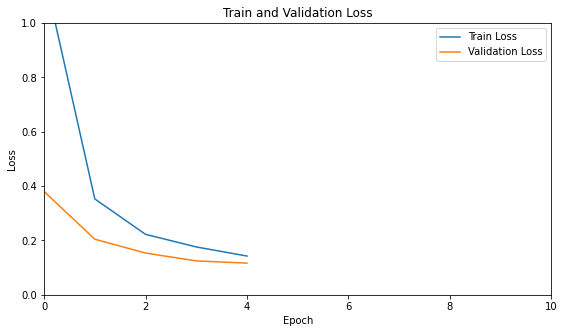

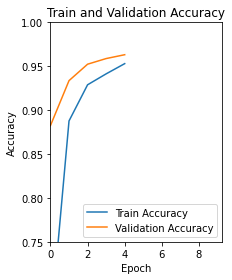

In [ ]:
# Viewing metrics
import matplotlib.pyplot as plt

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(m1_res.history['loss'],label="Train Loss")
plt.plot(m1_res.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(m1_res.history['Accuracy'], label="Train Accuracy")
plt.plot(m1_res.history['val_Accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()
plt.show()

550/550 [==============================] - 44s 80ms/step
[[469   2   0 ...   0   0   0]
 [  0 491   0 ...   0   0   0]
 [  2   0 433 ...   0   0   0]
 ...
 [  0   0   0 ... 488   0   0]
 [  0   0   0 ...   0 445   1]
 [  0   0   1 ...   0   0 439]]


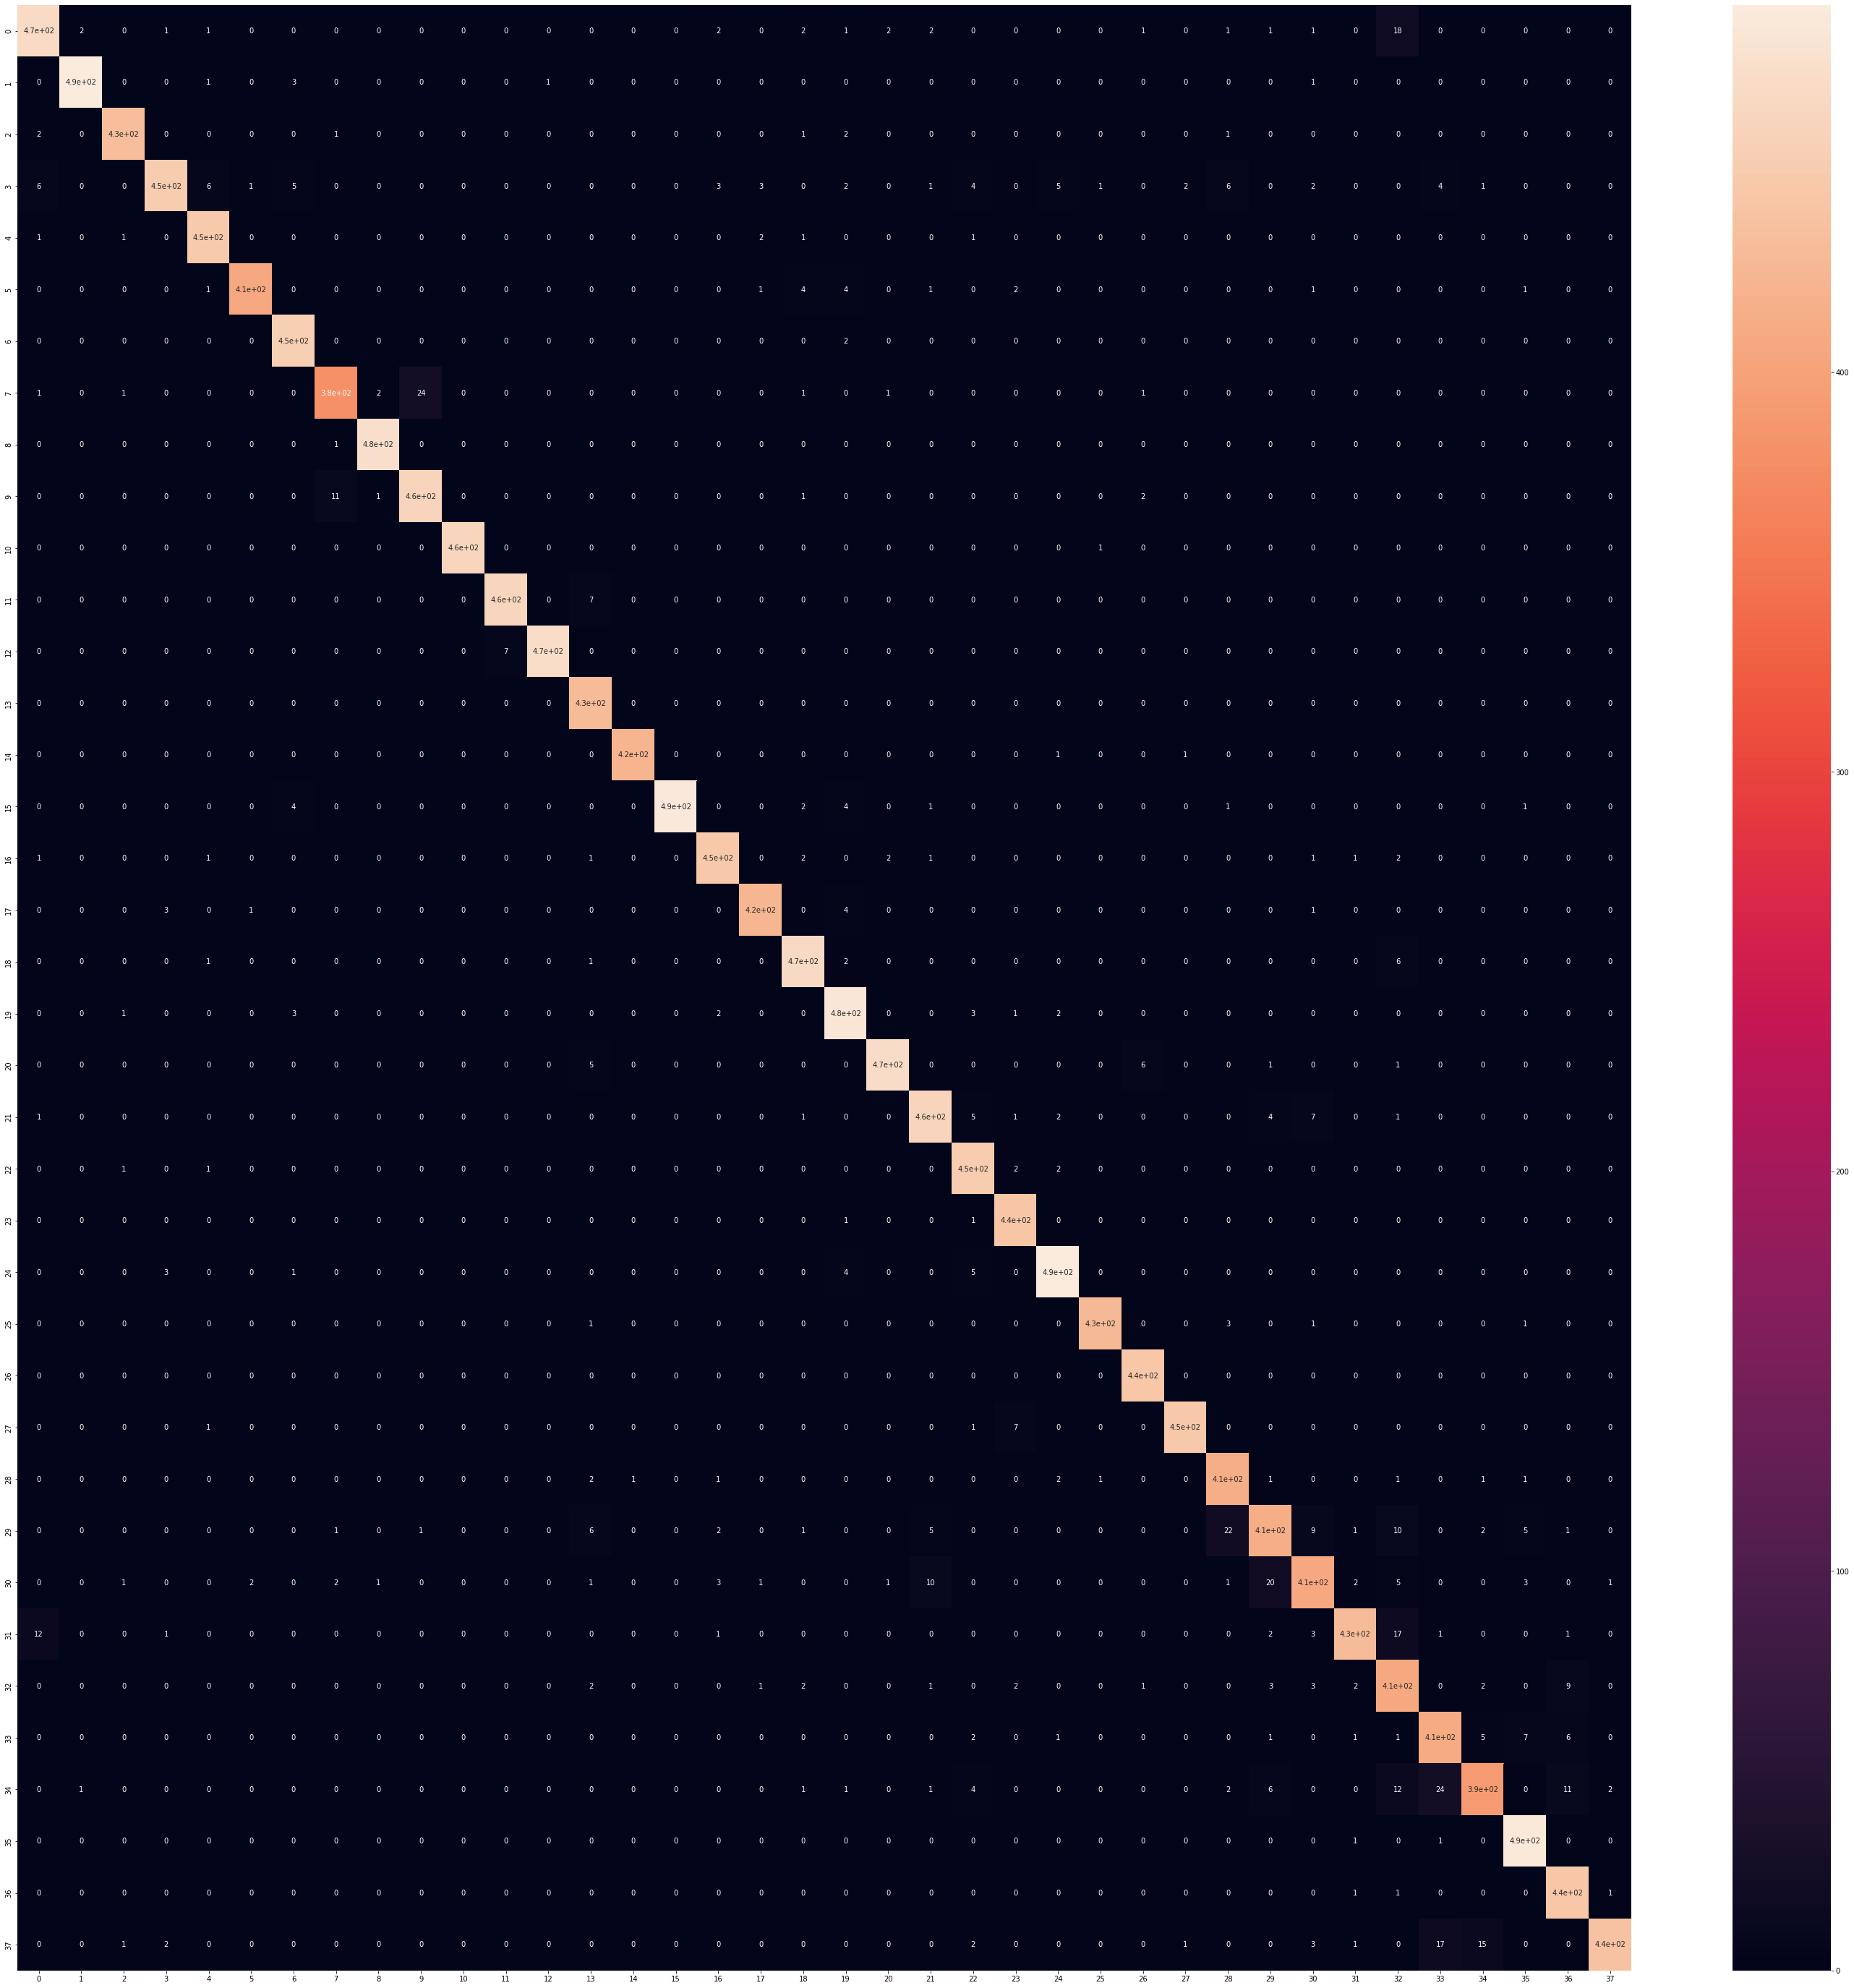

In [ ]:
import numpy as np

pred_data = model_1.predict(test_generator)

y_pred_binary = np.argmax(pred_data, axis = 1)
plt.figure(figsize=(50,50))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
cm = confusion_matrix(test_generator.classes,y_pred_binary)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
cm = classification_report(test_generator.classes,y_pred_binary)
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       504
           1       0.99      0.99      0.99       497
           2       0.99      0.98      0.99       440
           3       0.98      0.90      0.94       502
           4       0.97      0.99      0.98       454
           5       0.99      0.96      0.98       421
           6       0.97      1.00      0.98       456
           7       0.96      0.92      0.94       410
           8       0.99      1.00      0.99       477
           9       0.95      0.97      0.96       477
          10       1.00      1.00      1.00       465
          11       0.99      0.99      0.99       472
          12       1.00      0.99      0.99       480
          13       0.94      1.00      0.97       430
          14       1.00      1.00      1.00       423
          15       1.00      0.97      0.99       503
          16       0.97      0.97      0.97       459
          17       0.98    

# Save and reload model

In [8]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
m1_saved = model_1.save("/content/gdrive/MyDrive/Saplings/disease/m1_saved")
m1_h5 = model_1.save("/content/gdrive/MyDrive/Saplings/disease/m1_hdf5.h5")

In [ ]:
import tensorflow
m1_recontr = tensorflow.keras.models.load_model("/content/gdrive/MyDrive/Saplings/disease/m1_hdf5.h5")

In [ ]:
m1_recontr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
# categories = list(train_generator.class_indices.keys())
# print(train_generator.class_indices)
categories = {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato___Leaf_Mold': 31, 'Tomato___Septoria_leaf_spot': 32, 'Tomato___Spider_mites Two-spotted_spider_mite': 33, 'Tomato___Target_Spot': 34, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 35, 'Tomato___Tomato_mosaic_virus': 36, 'Tomato___healthy': 37}
print(categories)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [ ]:
import json
with open('/content/gdrive/MyDrive/Saplings/disease/class_indices.json','w') as f:
  json.dump(train_generator.class_indices, f)

from IPython.display import FileLink
FileLink(r'/content/gdrive/MyDrive/Saplings/disease/class_indices.json')

/content/gdrive/MyDrive/Saplings/disease/class_indices.json

1/1 [==============================] - 0s 74ms/step
[[7.10001918e-11 1.37264919e-08 9.99997139e-01 9.02726719e-15
  1.18947241e-07 2.35042957e-11 4.55607882e-13 4.23705693e-09
  1.82319058e-13 4.69849908e-13 4.77971534e-16 6.06830763e-09
  1.44833422e-07 9.95584772e-14 1.04183264e-13 4.02988884e-15
  9.65022940e-12 1.08353031e-14 2.23878601e-06 2.72961493e-08
  2.68201937e-14 5.07837045e-13 4.84106533e-10 3.84329439e-07
  7.12460852e-16 1.83267117e-12 8.37310665e-09 1.69896681e-12
  8.76440196e-13 6.00895982e-12 1.52315400e-11 2.94906210e-14
  4.24727027e-08 8.80587628e-16 7.97463162e-09 4.68646389e-12
  5.98886496e-09 4.40430299e-17]]


2

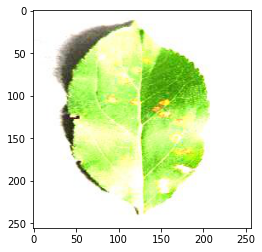

In [ ]:
im1 = "/content/gdrive/MyDrive/Saplings/disease/test/test/AppleCedarRust1.JPG"
dat = tensorflow.keras.utils.load_img(im1)
plt.imshow(dat)
test_dat = tensorflow.keras.preprocessing.image.img_to_array(dat)
test_dat = test_dat/255.0
test_dl = np.expand_dims(test_dat, axis=0)
pred = m1_recontr.predict(test_dl)

print(pred)
y_class = np.argmax(pred,axis=1)

y_class[0]

In [ ]:
# yt = train_generator.class_indices
# yt

yt = categories
yt

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
classes=['Apple_scab', 'Apple_Black_rot', 'Cedar_apple_rust', 
         'Apple_healthy', 'Blueberry_healthy', 
         'Cherry_Powdery_mildew', 'Cherry_healthy', 
         'Corn_Cercospora_leaf_spot', 'Corn_Common_rust_', 
         'Corn_Northern_Leaf_Blight', 'Corn_healthy', 
         'Grape_Black_rot', 'Grape_Black_Measles', 
         'Grape_Leaf_blight', 'Grape_healthy', 
         'Orange_Haunglongbing', 'Peach_Bacterial_spot', 
         'Peach_healthy', 'Pepper,_bell_Bacterial_spot', 'Pepper,_bell_healthy', 
         'Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy', 
         'Raspberry_healthy', 'Soybean_healthy', 'Squash_Powdery_mildew', 
         'Strawberry_Leaf_scorch', 'Strawberry_healthy', 'Tomato_Bacterial_spot', 
         'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 
         'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites Two-spotted_spider_mite', 
         'Tomato_Target_Spot', 'Tomato_Tomato_Yellow_Leaf_Curl_Virus', 
         'Tomato_Tomato_mosaic_virus', 'Tomato_healthy']

In [ ]:
print(classes[y_class[0]])

Cedar_apple_rust


1/1 [==============================] - 0s 20ms/step
[[3.24895557e-22 8.17977120e-25 1.47850217e-22 0.00000000e+00
  3.76411865e-34 8.35528520e-30 6.78781177e-34 9.29777585e-21
  1.00000000e+00 1.35567485e-28 1.84689739e-36 5.21690647e-31
  7.29271684e-25 6.28831245e-28 3.92012658e-36 1.93305454e-34
  6.53046251e-27 0.00000000e+00 1.03591187e-15 1.59207071e-28
  1.02073693e-19 4.20799748e-34 1.15484056e-31 9.19122045e-33
  0.00000000e+00 6.62888947e-38 4.25869360e-24 1.94473008e-37
  4.64115022e-29 3.66965471e-24 3.49737948e-23 9.00929198e-32
  9.28518820e-22 0.00000000e+00 3.52775808e-29 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Corn_Common_rust_


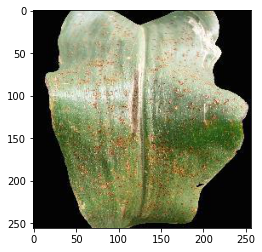

In [ ]:
im1 = "/content/gdrive/MyDrive/Saplings/disease/test/test/CornCommonRust2.JPG"
dat = tensorflow.keras.utils.load_img(im1)
plt.imshow(dat)
test_dat = tensorflow.keras.preprocessing.image.img_to_array(dat)
test_dat = test_dat/255.0
test_dl = np.expand_dims(test_dat, axis=0)
pred = m1_recontr.predict(test_dl)

print(pred)
y_class = np.argmax(pred,axis=1)

y_class[0]
print(classes[y_class[0]])